In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
# Initialising the ANN
classifier = Sequential()

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))  

In [18]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [19]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Total params tells us how many wts and bias params are there in the NN structure

In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 1ms/step - loss: 0.5250 - accuracy: 0.7897 - val_loss: 0.4808 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 948us/step - loss: 0.4679 - accuracy: 0.7964 - val_loss: 0.4556 - val_accuracy: 0.7944
Epoch 3/100
536/536 [==============================] - 1s 958us/step - loss: 0.4442 - accuracy: 0.7987 - val_loss: 0.4391 - val_accuracy: 0.7986
Epoch 4/100
536/536 [==============================] - 1s 960us/step - loss: 0.4323 - accuracy: 0.8102 - val_loss: 0.4300 - val_accuracy: 0.8095
Epoch 5/100
536/536 [==============================] - 1s 952us/step - loss: 0.4235 - accuracy: 0.8192 - val_loss: 0.4252 - val_accuracy: 0.8137
Epoch 6/100
536/536 [==============================] - 1s 971us/step - loss: 0.4164 - accuracy: 0.8244 - val_loss: 0.4192 - val_accuracy: 0.8156
Epoch 7/100
536/536 [==============================] - 1s 963us/step - loss: 0.4087 - accuracy: 0.8293 - val_loss: 0.4126 - val_accu

536/536 [==============================] - 1s 976us/step - loss: 0.3308 - accuracy: 0.8634 - val_loss: 0.3633 - val_accuracy: 0.8478
Epoch 58/100
536/536 [==============================] - 1s 950us/step - loss: 0.3302 - accuracy: 0.8634 - val_loss: 0.3660 - val_accuracy: 0.8482
Epoch 59/100
536/536 [==============================] - 1s 950us/step - loss: 0.3303 - accuracy: 0.8630 - val_loss: 0.3638 - val_accuracy: 0.8474
Epoch 60/100
536/536 [==============================] - 1s 947us/step - loss: 0.3303 - accuracy: 0.8636 - val_loss: 0.3647 - val_accuracy: 0.8489
Epoch 61/100
536/536 [==============================] - 1s 945us/step - loss: 0.3300 - accuracy: 0.8636 - val_loss: 0.3660 - val_accuracy: 0.8482
Epoch 62/100
536/536 [==============================] - 1s 950us/step - loss: 0.3302 - accuracy: 0.8634 - val_loss: 0.3644 - val_accuracy: 0.8493
Epoch 63/100
536/536 [==============================] - 1s 950us/step - loss: 0.3300 - accuracy: 0.8628 - val_loss: 0.3646 - val_accuracy

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 2s 609us/step


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[1513,   82],
       [ 206,  199]], dtype=int64)

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [30]:
score

0.856

In [31]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


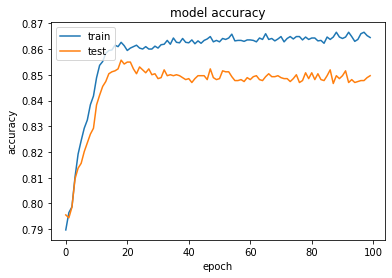

In [33]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

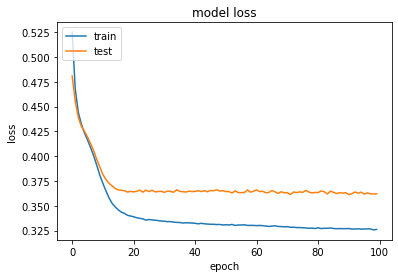

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()